> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_excel('Innovation_data_economy_2022.xlsx')


In [4]:
df.head()

,countrycode,country,year,GDP per capita (current US$),GNI (current US$),CO2 emissions (metric tons per capita),HDI,GII (SCORE)
0,ALB,Albania,2013,4413.062005,1.299654e+10,1.533630,0.782,30.9
1,ALB,Albania,2014,4578.633208,1.334942e+10,1.668337,0.787,30.5
2,ALB,Albania,2015,3952.802538,1.152181e+10,1.603775,0.788,30.7
3,ALB,Albania,2016,4124.055390,1.205383e+10,1.557664,0.788,28.4
4,ALB,Albania,2017,4531.019374,1.305148e+10,1.788786,0.790,28.9


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

In [5]:
df.shape

(1287, 8)

In [6]:
# check the empty data and the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   countrycode                             1287 non-null   object 
 1   country                                 1287 non-null   object 
 2   year                                    1287 non-null   int64  
 3   GDP per capita (current US$)            1280 non-null   float64
 4   GNI (current US$)                       1273 non-null   float64
 5   CO2 emissions (metric tons per capita)  994 non-null    float64
 6   HDI                                     1001 non-null   float64
 7   GII (SCORE)                             1167 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 80.6+ KB


In [7]:
df['GNI (current US$)_float'] = df['GNI (current US$)'].apply(lambda x: float(x))

In [8]:
df.head()

,countrycode,country,year,GDP per capita (current US$),GNI (current US$),CO2 emissions (metric tons per capita),HDI,GII (SCORE),GNI (current US$)_float
0,ALB,Albania,2013,4413.062005,1.299654e+10,1.533630,0.782,30.9,1.299654e+10
1,ALB,Albania,2014,4578.633208,1.334942e+10,1.668337,0.787,30.5,1.334942e+10
2,ALB,Albania,2015,3952.802538,1.152181e+10,1.603775,0.788,30.7,1.152181e+10
3,ALB,Albania,2016,4124.055390,1.205383e+10,1.557664,0.788,28.4,1.205383e+10
4,ALB,Albania,2017,4531.019374,1.305148e+10,1.788786,0.790,28.9,1.305148e+10


In [9]:
df['GNI'] = df['GNI (current US$)_float']/1000000000000

<AxesSubplot:>

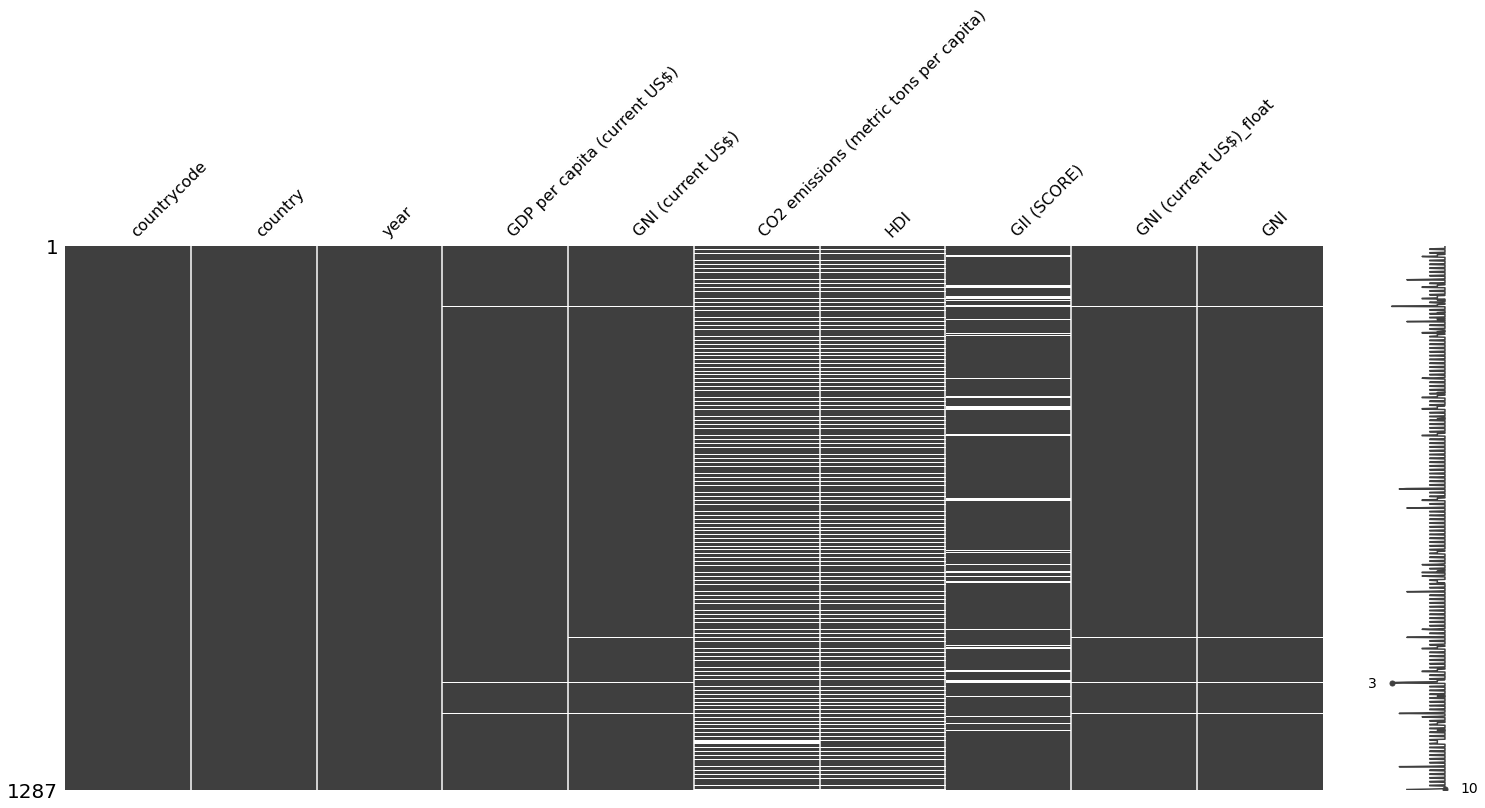

In [11]:
msno.matrix(df)

In [12]:
df.year.value_counts()

2013    143
2014    143
2015    143
2016    143
2017    143
2018    143
2019    143
2020    143
2021    143
Name: year, dtype: int64

In [13]:
df.country.nunique()

143

The number of countries is 143 and the number of data point for the year column for each year is 143

In [14]:
df.describe()

,year,GDP per capita (current US$),GNI (current US$),CO2 emissions (metric tons per capita),HDI,GII (SCORE),GNI (current US$)_float,GNI
count,1287.000000,1280.000000,1.273000e+03,994.000000,1001.000000,1167.000000,1.273000e+03,1273.000000
mean,2017.000000,16327.867713,5.713797e+11,4.808728,0.742008,36.426135,5.713797e+11,0.571380
std,2.582993,21147.527406,2.091800e+12,5.287581,0.145132,11.883197,2.091800e+12,2.091800
min,2013.000000,223.862876,1.136239e+09,0.038601,0.357000,12.700000,1.136239e+09,0.001136
25%,2015.000000,2521.287598,1.656062e+10,1.058227,0.652000,27.400000,1.656062e+10,0.016561
50%,2017.000000,6604.441155,5.977622e+10,3.324678,0.766000,34.100000,5.977622e+10,0.059776
75%,2019.000000,20824.387947,3.285313e+11,6.473162,0.854000,44.250000,3.285313e+11,0.328531
max,2021.000000,135682.794275,2.339312e+13,33.205895,0.957000,68.400000,2.339312e+13,23.393117


There is a large variation of the scale of the numbers in the differtent columns from fractions to large numbers of 11 and 12 digits

The data should be normalized

In [15]:
# drop the empty data 
df = df.dropna(axis = 0)

In [16]:
df.shape

(905, 10)

In [17]:
df.year.value_counts()

2014    138
2013    136
2015    136
2016    125
2017    125
2018    123
2019    122
Name: year, dtype: int64

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'GDP per capita (current US$)'}>,
        <AxesSubplot:title={'center':'GNI (current US$)'}>],
       [<AxesSubplot:title={'center':'CO2 emissions (metric tons per capita)'}>,
        <AxesSubplot:title={'center':'HDI'}>,
        <AxesSubplot:title={'center':'GII (SCORE)'}>],
       [<AxesSubplot:title={'center':'GNI (current US$)_float'}>,
        <AxesSubplot:title={'center':'GNI'}>, <AxesSubplot:>]],
      dtype=object)

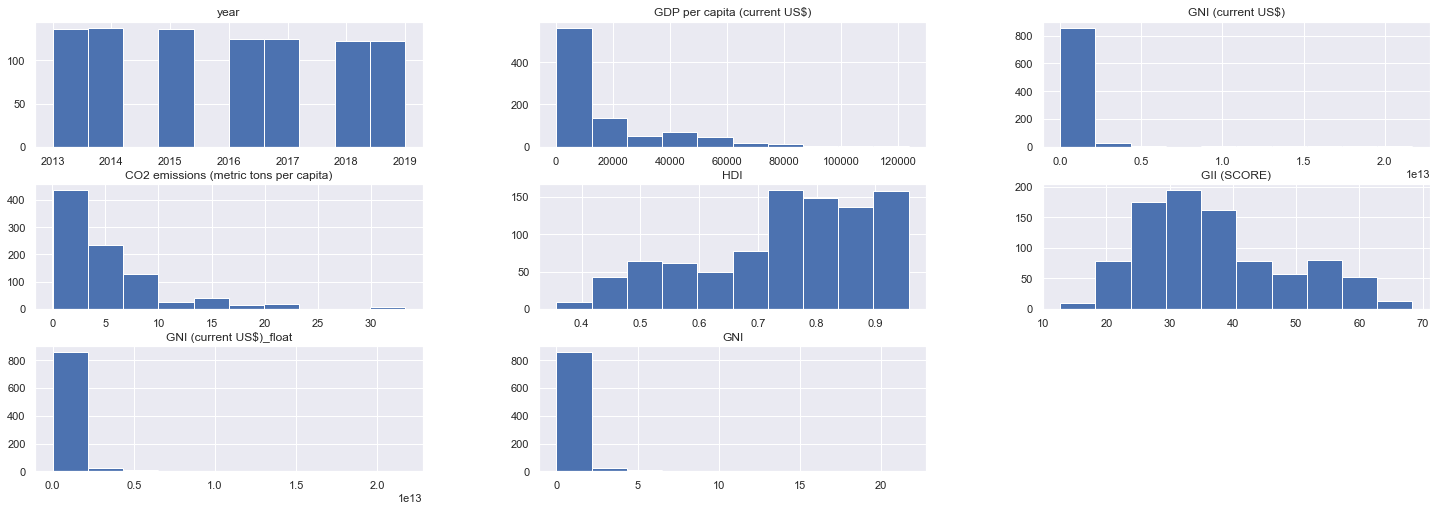

In [18]:
sns.set(rc={'figure.figsize':(25,8.27)})
df.hist()

In [23]:
df_s = df[['country','year','GNI', 'HDI', 'GII (SCORE)', 'GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)']]

In [24]:
df_s

,country,year,GNI,HDI,GII (SCORE),GDP per capita (current US$),CO2 emissions (metric tons per capita)
0,Albania,2013,0.012997,0.782,30.9,4413.062005,1.533630
1,Albania,2014,0.013349,0.787,30.5,4578.633208,1.668337
2,Albania,2015,0.011522,0.788,30.7,3952.802538,1.603775
3,Albania,2016,0.012054,0.788,28.4,4124.055390,1.557664
4,Albania,2017,0.013051,0.790,28.9,4531.019374,1.788786
...,...,...,...,...,...,...,...
1280,Yemen,2015,0.041099,0.483,20.8,1601.807163,0.511362
1281,Yemen,2016,0.031254,0.474,14.6,1152.738019,0.399364
1282,Yemen,2017,0.026802,0.467,15.6,964.340344,0.359622
1283,Yemen,2018,0.021590,0.468,15.0,758.145949,0.341068


In [45]:
## working out slicing hthe dataframe on a year then normalizing the data and returing the resulting dataframe
from scipy.stats import zscore
df_year = df[df_s['year']== 2013]
df_year_ = df_year[['GNI', 'HDI', 'GII (SCORE)', 'GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)']]
df_year_norm = df_year_.apply(zscore)
df_year_norm = pd.concat([df_year[['country', 'year']],df_year_norm], axis = 1)

In [46]:
df_year_norm.head()

,country,year,GNI,HDI,GII (SCORE),GDP per capita (current US$),CO2 emissions (metric tons per capita)
0,Albania,2013,-0.300751,0.331237,-0.610107,-0.572250,-0.633921
9,Algeria,2013,-0.193755,-0.033164,-1.320614,-0.523331,-0.259868
18,Angola,2013,-0.239230,-1.229500,-1.284178,-0.540074,-0.722031
27,Argentina,2013,-0.007884,0.695638,0.009310,-0.182026,-0.136361
36,Armenia,2013,-0.301414,0.193727,0.000201,-0.598133,-0.569346


In [52]:
## Normalize the dataframe for each year
from scipy.stats import zscore

## working out slicing hthe dataframe on a year then normalizing the data and returing the resulting dataframe
df_year = df[df_s['year']== 2013]
df_year_ = df_year[['GNI', 'HDI', 'GII (SCORE)', 'GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)']]
df_year_norm = df_year_.apply(zscore)
df_2013_norm = pd.concat([df_year[['country', 'year']],df_year_norm], axis = 1)

In [54]:
## working out slicing hthe dataframe on a year then normalizing the data and returing the resulting dataframe
df_year = df[df_s['year']== 2014]
df_year_ = df_year[['GNI', 'HDI', 'GII (SCORE)', 'GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)']]
df_year_norm = df_year_.apply(zscore)
df_2014_norm = pd.concat([df_year[['country', 'year']],df_year_norm], axis = 1)

In [56]:
## working out slicing hthe dataframe on a year then normalizing the data and returing the resulting dataframe
df_year = df[df_s['year']== 2015]
df_year_ = df_year[['GNI', 'HDI', 'GII (SCORE)', 'GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)']]
df_year_norm = df_year_.apply(zscore)
df_2015_norm = pd.concat([df_year[['country', 'year']],df_year_norm], axis = 1)

In [57]:
df_year = df[df_s['year']== 2016]
df_year_ = df_year[['GNI', 'HDI', 'GII (SCORE)', 'GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)']]
df_year_norm = df_year_.apply(zscore)
df_2016_norm = pd.concat([df_year[['country', 'year']],df_year_norm], axis = 1)

In [58]:
df_year = df[df_s['year']== 2017]
df_year_ = df_year[['GNI', 'HDI', 'GII (SCORE)', 'GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)']]
df_year_norm = df_year_.apply(zscore)
df_2017_norm = pd.concat([df_year[['country', 'year']],df_year_norm], axis = 1)

In [59]:
df_year = df[df_s['year']== 2018]
df_year_ = df_year[['GNI', 'HDI', 'GII (SCORE)', 'GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)']]
df_year_norm = df_year_.apply(zscore)
df_2018_norm = pd.concat([df_year[['country', 'year']],df_year_norm], axis = 1)

In [60]:
df_year = df[df_s['year']== 2019]
df_year_ = df_year[['GNI', 'HDI', 'GII (SCORE)', 'GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)']]
df_year_norm = df_year_.apply(zscore)
df_2019_norm = pd.concat([df_year[['country', 'year']],df_year_norm], axis = 1)

In [61]:
# final dataframe that has normalized data for each year 

df_s_n = pd.concat([df_2013_norm, df_2014_norm, df_2015_norm, df_2016_norm, df_2017_norm, df_2018_norm, df_2019_norm], axis = 0)

In [62]:
df_s_n.head()

,country,year,GNI,HDI,GII (SCORE),GDP per capita (current US$),CO2 emissions (metric tons per capita)
0,Albania,2013,-0.300751,0.331237,-0.610107,-0.572250,-0.633921
9,Algeria,2013,-0.193755,-0.033164,-1.320614,-0.523331,-0.259868
18,Angola,2013,-0.239230,-1.229500,-1.284178,-0.540074,-0.722031
27,Argentina,2013,-0.007884,0.695638,0.009310,-0.182026,-0.136361
36,Armenia,2013,-0.301414,0.193727,0.000201,-0.598133,-0.569346


In [63]:
df_s_n.describe()

,year,GNI,HDI,GII (SCORE),GDP per capita (current US$),CO2 emissions (metric tons per capita)
count,905.000000,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02
mean,2015.908287,2.600743e-17,-3.434944e-17,7.851301e-18,5.949814e-17,1.987361e-17
std,2.000937,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00,1.000553e+00
min,2013.000000,-3.071584e-01,-2.621271e+00,-2.179942e+00,-8.047170e-01,-9.669786e-01
25%,2014.000000,-2.786514e-01,-6.059971e-01,-7.606463e-01,-6.635995e-01,-7.169535e-01
50%,2016.000000,-2.534876e-01,1.593497e-01,-1.894568e-01,-4.601561e-01,-2.582387e-01
75%,2018.000000,-1.273691e-01,7.787935e-01,6.300628e-01,2.701070e-01,3.332574e-01
max,2019.000000,9.398657e+00,1.458818e+00,2.689673e+00,4.812473e+00,5.433745e+00


<AxesSubplot:>

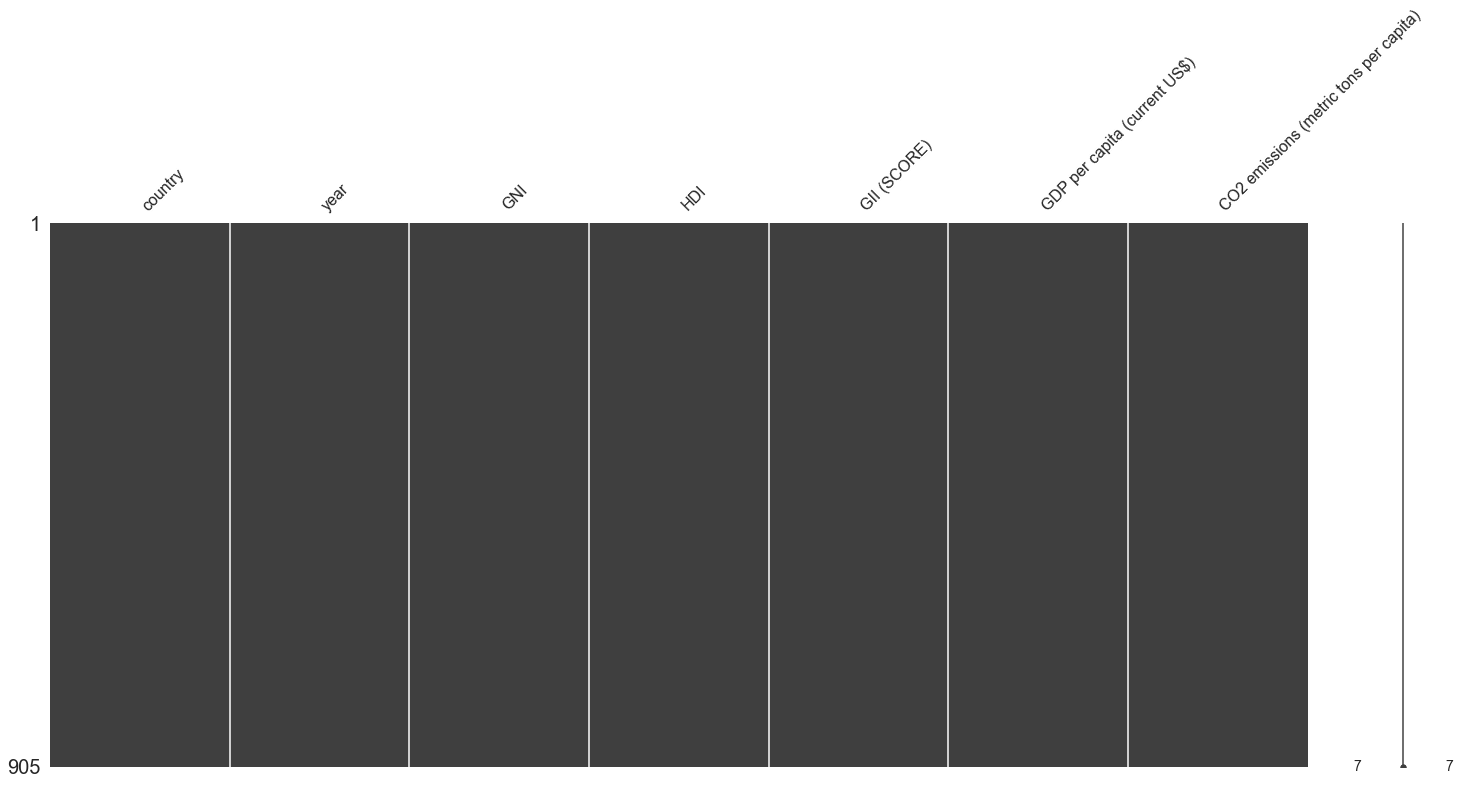

In [64]:
msno.matrix(df_s_n)

In [66]:
df_s_n.year.value_counts()

2014    138
2013    136
2015    136
2016    125
2017    125
2018    123
2019    122
Name: year, dtype: int64

In [69]:
"""
https://dspyt.com/panel-data-econometrics-an-introduction-with-an-example-in-python/


https://dspyt.com/panel-data-econometrics-an-introduction-with-an-example-in-python/


https://bashtage.github.io/linearmodels/panel/examples/examples.html
"""

'\nhttps://dspyt.com/panel-data-econometrics-an-introduction-with-an-example-in-python/\n\n\nhttps://dspyt.com/panel-data-econometrics-an-introduction-with-an-example-in-python/\n\n\nhttps://bashtage.github.io/linearmodels/panel/examples/examples.html\n'

In [68]:
df_s_n.to_csv('cleaned_dataset_normalized_annually.csv')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!